In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import json

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open("/home/arnavshah/activity-net/activity_net.v1-3.min.json", "r") as f:
    annotations = json.load(f)

In [4]:
# annotations['database'][video_id]['annotations'][0]['segment'][0], annotations['database'][video_id]['annotations'][0]['segment'][1]

# VIVIT 512

In [5]:
feat_paths = [f"tsp-features-vivit-512-epoch-{i}/train" for i in range(8)]
feat_paths

['tsp-features-vivit-512-epoch-0/train',
 'tsp-features-vivit-512-epoch-1/train',
 'tsp-features-vivit-512-epoch-2/train',
 'tsp-features-vivit-512-epoch-3/train',
 'tsp-features-vivit-512-epoch-4/train',
 'tsp-features-vivit-512-epoch-5/train',
 'tsp-features-vivit-512-epoch-6/train',
 'tsp-features-vivit-512-epoch-7/train']

In [6]:
feats = [os.listdir(feat_path)[:4] for feat_path in feat_paths]
feats

[['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl'],
 ['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl'],
 ['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl'],
 ['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl'],
 ['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl'],
 ['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl'],
 ['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl'],
 ['v_00Dk03Jr70M.pkl',
  'v_00S8I27qDU4.pkl',
  'v_02V8Hz-M6BM.pkl',
  'v_02WlEYafQ9Q.pkl']]

In [7]:
def cosine_distance_torch(x1, x2=None, eps=1e-8):
    x2 = x1 if x2 is None else x2
    w1 = x1.norm(p=2, dim=1, keepdim=True)
    w2 = w1 if x2 is x1 else x2.norm(p=2, dim=1, keepdim=True)
    return 1 - torch.mm(x1, x2.t()) / (w1 * w2.t()).clamp(min=eps)

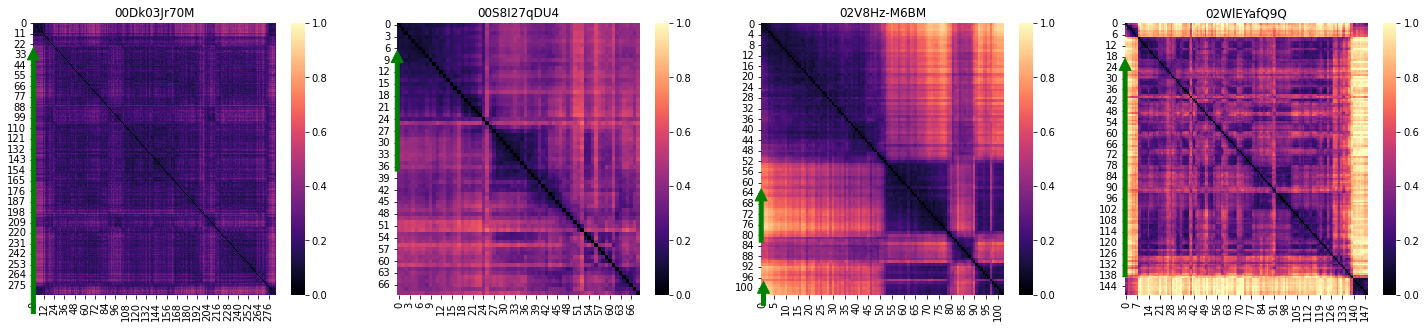

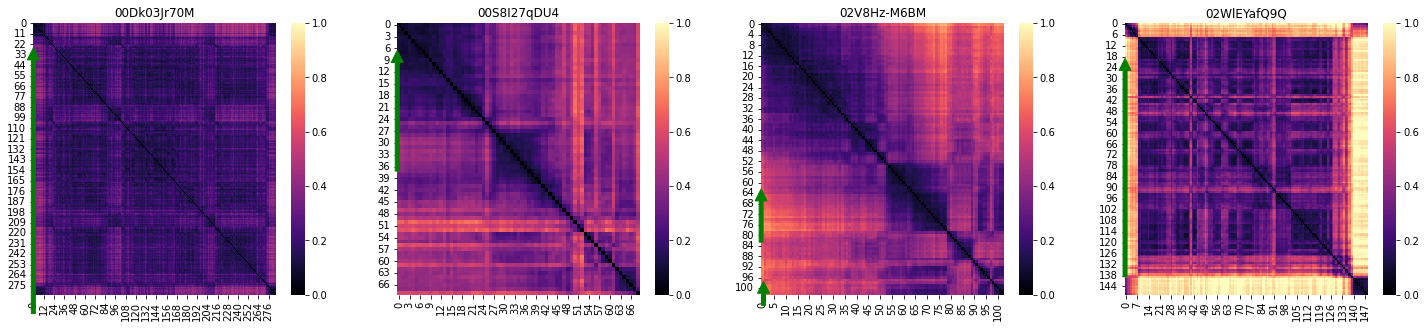

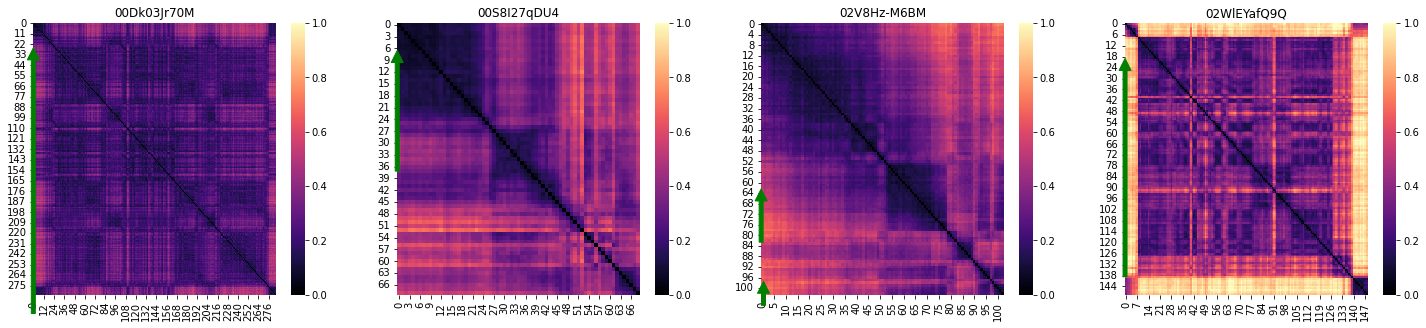

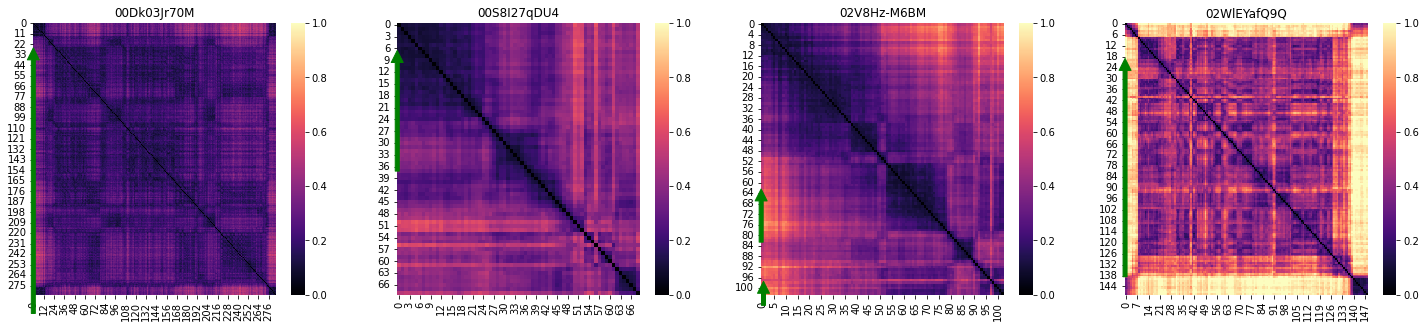

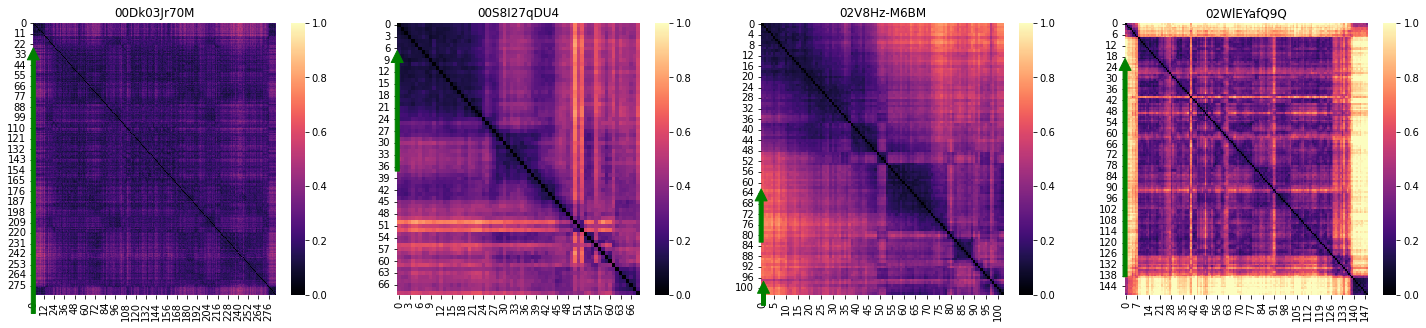

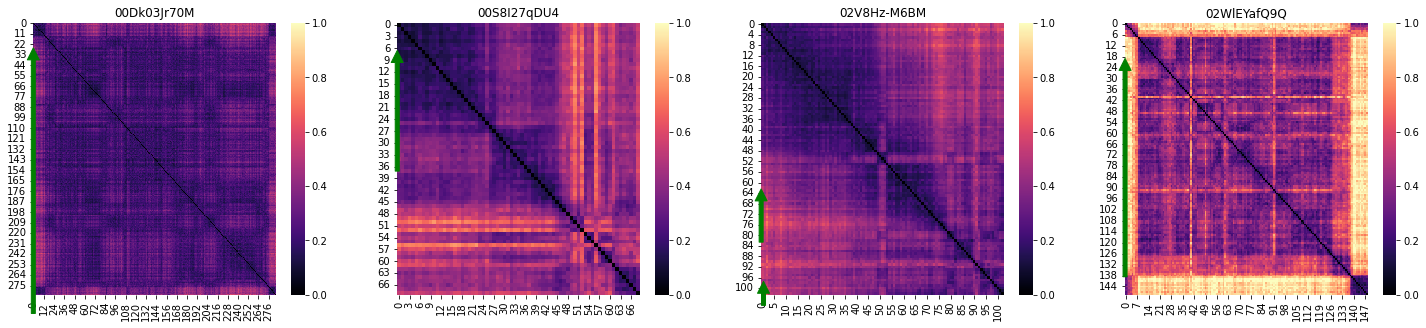

In [8]:
for epoch in range(6):
    
    fig, ax = plt.subplots(1, 4, figsize=(25, 5))
    
    for i, pkl in enumerate(feats[epoch]):
        with open(f"{feat_paths[epoch]}/{pkl}", "rb") as f:
            tsp_feat = pickle.load(f)
        sns.heatmap(cosine_distance_torch(torch.tensor(tsp_feat)), ax=ax[i], vmin=0, vmax=1, cmap='magma')
        video_id = pkl[2:-4]
        gt_annotations = annotations['database'][video_id]['annotations']
        for gt_i, gt_annotation in enumerate(gt_annotations):
            gt_start, gt_end = gt_annotation['segment'][0], gt_annotation['segment'][1]
            gt_start, gt_end = gt_start * 2, gt_end * 2
            ax[i].annotate('', xy=(gt_i, gt_start), xycoords='data', xytext=(gt_i, gt_end), arrowprops=dict(width=4, color='g'))
        ax[i].set_title(video_id)
        

# VIVIT 768

In [9]:
feat_path = "/home/arnavshah/tsp/tsp-features-vivit-nogvf/train_feats"

In [10]:
feats = os.listdir(feat_path)[:4]
feats

['v_00Dk03Jr70M.pkl',
 'v_00S8I27qDU4.pkl',
 'v_02V8Hz-M6BM.pkl',
 'v_02WlEYafQ9Q.pkl']

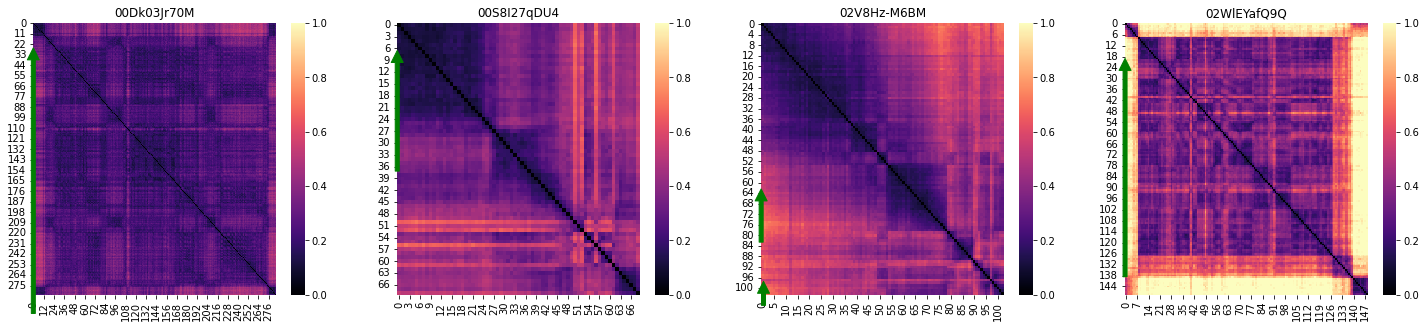

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(25, 5))
    
for i, pkl in enumerate(feats):
    with open(f"{feat_path}/{pkl}", "rb") as f:
        tsp_feat = pickle.load(f)
    sns.heatmap(cosine_distance_torch(torch.tensor(tsp_feat)), ax=ax[i], vmin=0, vmax=1, cmap='magma')
    video_id = pkl[2:-4]
    gt_annotations = annotations['database'][video_id]['annotations']
    for gt_i, gt_annotation in enumerate(gt_annotations):
        gt_start, gt_end = gt_annotation['segment'][0], gt_annotation['segment'][1]
        gt_start, gt_end = gt_start * 2, gt_end * 2
        ax[i].annotate('', xy=(gt_i, gt_start), xycoords='data', xytext=(gt_i, gt_end), arrowprops=dict(width=4, color='g'))
    ax[i].set_title(video_id)

# VIVIT pre-TSP

In [12]:
feat_path = "/home/arnavshah/tsp/video-features-vivit/train"

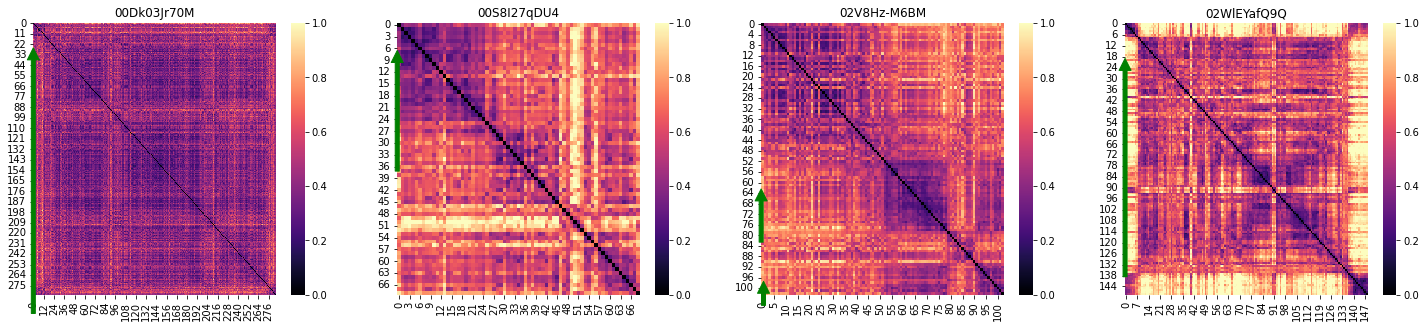

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(25, 5))
    
for i, pkl in enumerate(feats):
    with open(f"{feat_path}/{pkl}", "rb") as f:
        tsp_feat = pickle.load(f)
    sns.heatmap(cosine_distance_torch(torch.tensor(tsp_feat)), ax=ax[i], vmin=0, vmax=1, cmap='magma')
    video_id = pkl[2:-4]
    gt_annotations = annotations['database'][video_id]['annotations']
    for gt_i, gt_annotation in enumerate(gt_annotations):
        gt_start, gt_end = gt_annotation['segment'][0], gt_annotation['segment'][1]
        gt_start, gt_end = gt_start * 2, gt_end * 2
        ax[i].annotate('', xy=(gt_i, gt_start), xycoords='data', xytext=(gt_i, gt_end), arrowprops=dict(width=4, color='g'))
    ax[i].set_title(video_id)

# Conclusion
## HELP